<a href="https://colab.research.google.com/github/salamlakhan7/LR_Ecommerce_client-pred_confusion-matrix/blob/main/Ec_client_pred_cm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Model Accuracy (R^2): 0.98
MAE: 8.558441885315231
RMSE: 10.48159058463647


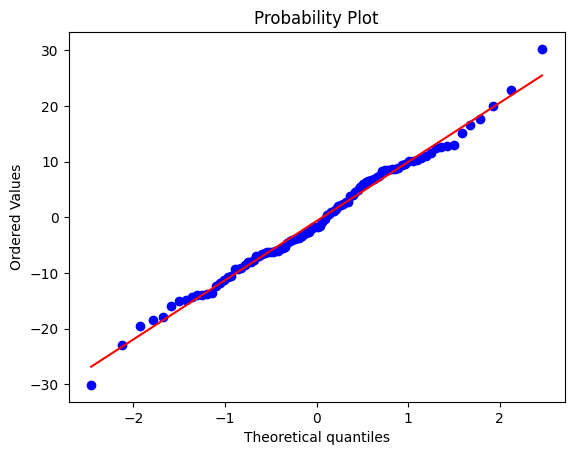

Classification Model Accuracy: 0.93


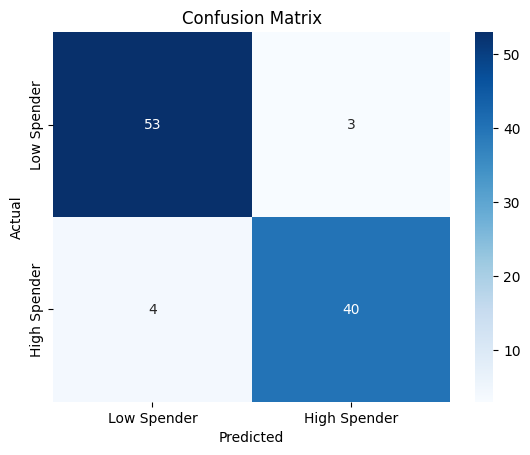

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.93      0.91      0.92        44

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

Avg. Session Length: 6
Time on App: 5
Time on Website: 5
Length of Membership: 14
Predicted Yearly Amount Spent: 171.3543998384623


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report
import math
import pylab
import scipy.stats as stats

# Load the dataset
file_path = "/content/Ecommerce Customers"
data = pd.read_csv(file_path)

# Regression Task
X = data[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = data["Yearly Amount Spent"]

# Train-test split for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate regression model
pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = math.sqrt(mean_squared_error(y_test, pred))
r_squared = lr.score(X_test, y_test)  # Model accuracy for regression
print(f"Regression Model Accuracy (R^2): {r_squared:.2f}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Residual Plot
residuals = y_test - pred
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

# Classification Task
threshold = y.median()
data['Spender Category'] = (data['Yearly Amount Spent'] > threshold).astype(int)

# Train-test split for classification
X_class = X
y_class = data['Spender Category']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train logistic regression model for classification
clf = LogisticRegression()
clf.fit(X_train_class, y_train_class)
y_pred_class = clf.predict(X_test_class)

# Evaluate classification model
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Model Accuracy: {classification_accuracy:.2f}")

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Spender", "High Spender"], yticklabels=["Low Spender", "High Spender"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test_class, y_pred_class))

# User Input Prediction
user_input = np.array([[float(input("Avg. Session Length: ")),
                        float(input("Time on App: ")),
                        float(input("Time on Website: ")),
                        float(input("Length of Membership: "))]])
predicted_value = lr.predict(user_input)
print(f"Predicted Yearly Amount Spent: {predicted_value[0]}")
